# PCA for telecom users

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### Loading the Data

In [2]:
data = pd.read_csv("telecom_users.csv", delimiter=",")

In [3]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
data.shape

(5986, 22)

In [5]:
# Classification Problem

y=data['Churn']
del data['Churn']

In [6]:
data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611
top,1299-AURJA,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10


##### To check the missing values

In [7]:
data.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [8]:
y.value_counts(ascending=False)

No     4399
Yes    1587
Name: Churn, dtype: int64

## EDA

In [9]:
# Onehot encoding for Y

y=pd.get_dummies(y,drop_first=True)
y

,Yes
0,0
1,0
2,1
3,0
4,0
...,...
5981,1
5982,0
5983,0
5984,1


##### Visualising the feature

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


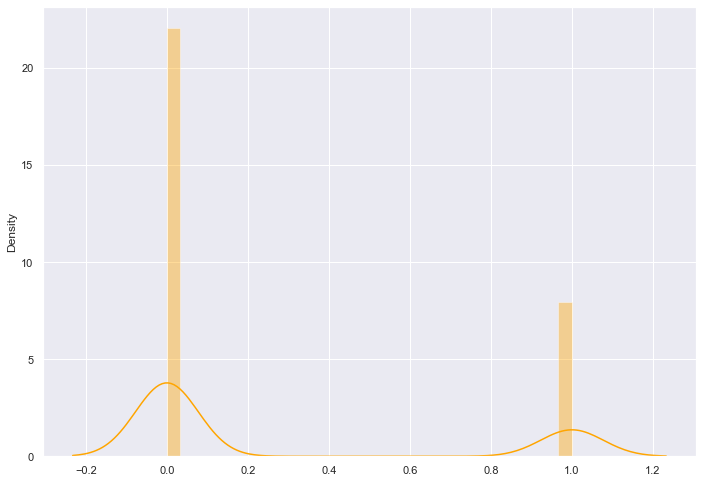

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30,color='orange')
plt.show()

### Fitting Label Encoder

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
for i in range(0, data.shape[1]):
    if data.dtypes[i]=='object':
        data[data.columns[i]] = le.fit_transform(data[data.columns[i]])

In [13]:
data.dtypes

Unnamed: 0            int64
customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
dtype: object

In [14]:
#Here we will create new dataframe with EP for correlation
correlation_df=data.copy()
correlation_df['MonthlyCharges']=y
correlation_df.head()


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1869,4252,1,0,1,1,72,1,2,2,...,1,1,1,1,1,2,0,1,0,1066
1,4528,5806,0,0,0,0,44,1,0,1,...,2,2,0,2,0,0,1,1,0,2901
2,6344,5577,0,1,1,0,38,1,2,1,...,0,0,0,0,0,0,1,0,1,2126
3,6739,4243,1,0,0,0,4,1,0,0,...,0,0,0,0,2,0,1,2,0,1733
4,432,1270,1,0,0,0,2,1,0,0,...,0,2,0,0,0,0,0,2,0,308


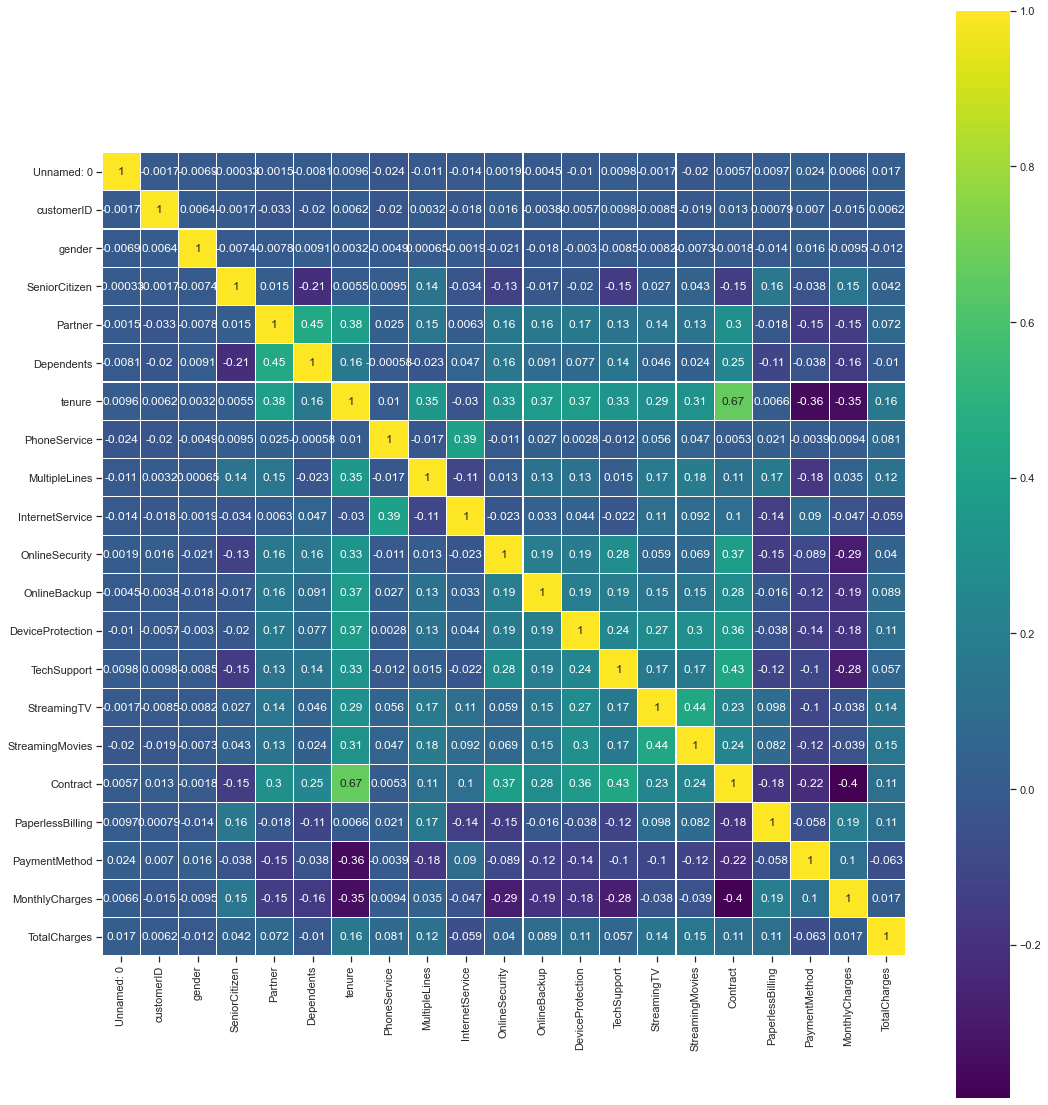

In [15]:
#Using the seaborn library for the heat map
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(18, 20))
sns.heatmap(correlation_df.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True,cmap='viridis')
plt.show()

In [16]:
X = data.iloc[:,0:21]  # all rows, all the features and no labels
y=y # all rows, label only

In [17]:
scaled_data = StandardScaler().fit_transform(X)

In [18]:
#printing the scaled_data
print(scaled_data)

[[-0.81775101  0.72887338  0.9811335  ... -0.53785519 -1.35168577
  -1.06879565]
 [ 0.48853908  1.62817408 -1.01922929 ... -0.53785519  0.77536006
   0.06245656]
 [ 1.38068755  1.49565165 -1.01922929 ... -1.47487533  0.33699933
  -0.41532026]
 ...
 [ 0.83144636  1.07956593  0.9811335  ...  0.39916494 -1.44965275
  -0.31421652]
 [ 0.91201484  0.87181242  0.9811335  ...  0.39916494  1.15062342
  -1.5274614 ]
 [-1.31344364 -0.07320562  0.9811335  ... -0.53785519 -1.4944851
   0.33001158]]


### The Algebra for PCA

In [19]:
#Find the covarience matrix which is : X.T*X
sample_data=scaled_data  

In [20]:
#Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

In [21]:
print("The shape of variance matrix is : ",covar_matrix.shape)

The shape of variance matrix is :  (21, 21)


In [23]:
#Finding top two eigen value and corresponding eigen vectors
#for projecting onto a 2-Dimension space.

from scipy.linalg import eigh

#The parameter 'eigvals' is defined(low value to high value)
#eigh function will return the eigen value in ascending order
#this code generates only top two eigen values 

values,vectors=eigh(covar_matrix,eigvals=(19,20))

print("The shape of eigen vectors = ",vectors.shape)
#converting the eigen vectors into (2,d) shape for easyness of further computations
vectors=vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
#here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
#here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

The shape of eigen vectors =  (21, 2)
Updated shape of eigen vectors =  (2, 21)


### Forming Prncipal Components

In [24]:
#projecting the original data sample on the plane .
#formed by two principal eigen vectors by vector-vector multiplication
new_coordinates=np.matmul(vectors,sample_data.T)

print("Resultant new data points shape ",vectors.shape,"X",sample_data.T.shape," = ",new_coordinates.shape)

Resultant new data points shape  (2, 21) X (21, 5986)  =  (2, 5986)


### Projection into the new features space

In [25]:
new_coordinates.T.shape,y.shape

((5986, 2), (5986, 1))

In [26]:
#Creating the Dataframe having 1st principal & 2nd principal

#creating new_dataframe for plotting labeled points
df=pd.DataFrame(data=new_coordinates.T,columns=['1st principal','2nd principal'])
df['target']=y
df.head()

,1st principal,2nd principal,target
0,-2.482914,1.893545,0
1,1.153033,-0.135409,0
2,2.006949,-1.142700,1
3,0.825369,-2.613406,0
4,-1.153183,-2.228102,0


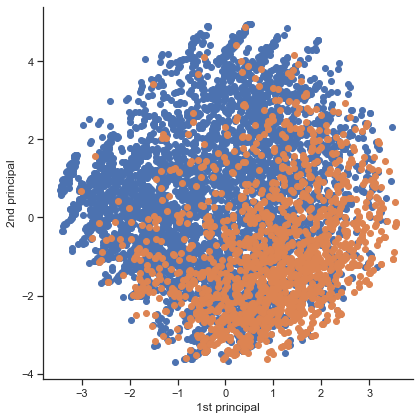

In [27]:
# ploting the 2d data points with seaborn
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, '1st principal', '2nd principal')
plt.show()

## Random Forest Classifier

In [28]:
# Splitting the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['1st principal','2nd principal']], y, test_size=0.3, random_state=1)

In [29]:
#print the shape of training data

X_train.shape,y_train.shape

((4190, 2), (4190, 1))

In [30]:
# Importing Library

from sklearn.ensemble import RandomForestRegressor

In [31]:
clf=RandomForestRegressor()
clf

RandomForestRegressor()

In [33]:
#Training model on different estimators to get best estimator with maximum score
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
       
print(scores)

<ipython-input-33-343ccccfd0f4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-33-343ccccfd0f4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-33-343ccccfd0f4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-33-343ccccfd0f4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-33-343ccccfd0f4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[0.0033506110011619628, 0.05213226840071583, 0.06541512825614193, 0.06532383846951251, 0.06355128074639493, 0.06718215373982939, 0.07324047885104434, 0.07905447864637305, 0.07177171837750462, 0.07596130053717809, 0.08018362876717411, 0.07406571709302334, 0.07847977081577895, 0.07250270833052819, 0.07572634491809671, 0.07533861946525588, 0.08097116711053776, 0.07936283199397443, 0.07801212682565228, 0.07972186771589207, 0.08358986371122012, 0.08063655796144786, 0.08006131716340747, 0.07715365289601595, 0.08192352630289301, 0.08100900585656212, 0.07906576894326367, 0.07712269756644508, 0.07912429906475704]


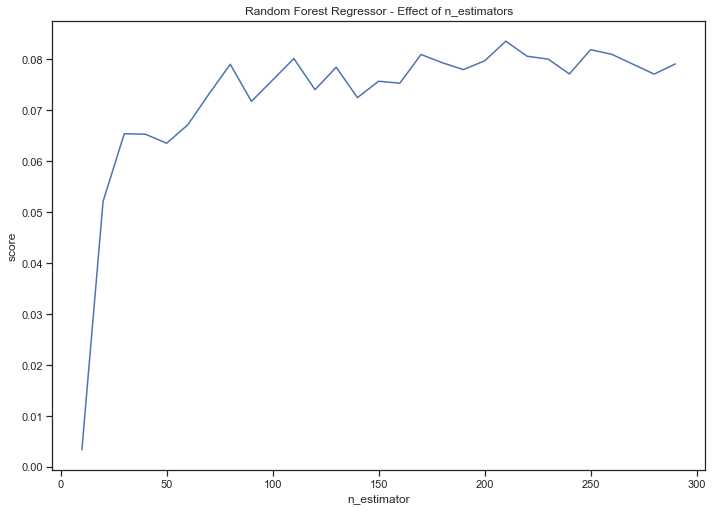

In [34]:
#Graph of estimators with their scores 
plt.title("Random Forest Regressor - Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [35]:
# Use the forest's predict method on the test data

predictions = clf.predict(X_test)

#### Determine Performance Metrics

In [37]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.30138046233008214
Mean Squared Error: 0.18175899541589316
Root Mean Squared Error: 0.4263320248537437
